In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import Dataset
suicide_data = pd.read_csv(r"C:\Users\Lyz\Documents\Python\Portfolio\Suicide Data\who_crude_suicide_data.csv")
suicide_data.head()

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,SDGSUICIDE,Crude suicide rates (per 100 000 population),text,AMR,Americas,Country,ATG,Antigua and Barbuda,Year,2019,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,EN,2021-07-06T04:00:00.000Z
1,SDGSUICIDE,Crude suicide rates (per 100 000 population),text,AMR,Americas,Country,ATG,Antigua and Barbuda,Year,2019,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,EN,2021-07-06T04:00:00.000Z
2,SDGSUICIDE,Crude suicide rates (per 100 000 population),text,AMR,Americas,Country,ATG,Antigua and Barbuda,Year,2019,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,EN,2021-07-06T04:00:00.000Z
3,SDGSUICIDE,Crude suicide rates (per 100 000 population),text,AMR,Americas,Country,ATG,Antigua and Barbuda,Year,2019,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,EN,2021-07-06T04:00:00.000Z
4,SDGSUICIDE,Crude suicide rates (per 100 000 population),text,AMR,Americas,Country,ATG,Antigua and Barbuda,Year,2019,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,EN,2021-07-06T04:00:00.000Z


In [3]:
# Look at all variables in the datset
suicide_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4392 entries, 0 to 4391
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   IndicatorCode               4392 non-null   object 
 1   Indicator                   4392 non-null   object 
 2   ValueType                   4392 non-null   object 
 3   ParentLocationCode          4392 non-null   object 
 4   ParentLocation              4392 non-null   object 
 5   Location type               4392 non-null   object 
 6   SpatialDimValueCode         4392 non-null   object 
 7   Location                    4392 non-null   object 
 8   Period type                 4392 non-null   object 
 9   Period                      4392 non-null   int64  
 10  IsLatestYear                4392 non-null   bool   
 11  Dim1 type                   4392 non-null   object 
 12  Dim1                        4392 non-null   object 
 13  Dim1ValueCode               4392 

In [4]:
# Rename the columns that are needed
suicide_data_new = suicide_data.rename(columns = {"ParentLocation": "Region", "Location": "Country", "Period": "Year", "Dim1": "Sex", "Dim2": "Age Range", "Value": "Suicide Rate (per 100,000 population)"})
# There are certain columns that are not needed, I can drop these and rename the ones that are needed
suicide_data_new = suicide_data_new.drop(["IndicatorCode", "Indicator", "ValueType", "ParentLocationCode", "Location type", "SpatialDimValueCode", 
                   "Period type", "IsLatestYear", "Dim1 type", "Dim1ValueCode", "Dim2 type", "Dim2ValueCode",
                   "Dim3 type", "Dim3", "Dim3ValueCode", "DataSourceDimValueCode", "DataSource", "FactValueNumericPrefix",
                   "FactValueNumeric", "FactValueUoM", "FactValueNumericLowPrefix", "FactValueNumericLow", 
                   "FactValueNumericHighPrefix", "FactValueNumericHigh", "FactValueTranslationID", "FactComments",
                   "Language"], axis = 1)

In [5]:
# Check data
suicide_data_new.info()
suicide_data_new.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4392 entries, 0 to 4391
Data columns (total 7 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Region                                 4392 non-null   object 
 1   Country                                4392 non-null   object 
 2   Year                                   4392 non-null   int64  
 3   Sex                                    4392 non-null   object 
 4   Age Range                              4392 non-null   object 
 5   Suicide Rate (per 100,000 population)  4392 non-null   float64
 6   DateModified                           4392 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 240.3+ KB


,Region,Country,Year,Sex,Age Range,"Suicide Rate (per 100,000 population)",DateModified
0,Americas,Antigua and Barbuda,2019,Both sexes,15-24 years,0.0,2021-07-06T04:00:00.000Z
1,Americas,Antigua and Barbuda,2019,Both sexes,25-34 years of age,0.0,2021-07-06T04:00:00.000Z
2,Americas,Antigua and Barbuda,2019,Both sexes,35-44 years of age,0.0,2021-07-06T04:00:00.000Z
3,Americas,Antigua and Barbuda,2019,Both sexes,45-54 years,0.0,2021-07-06T04:00:00.000Z
4,Americas,Antigua and Barbuda,2019,Both sexes,65-74 years,0.0,2021-07-06T04:00:00.000Z


In [6]:
# Look at shape of data
print("(Rows, columns): " + str(suicide_data_new.shape))
suicide_data_new.columns

(Rows, columns): (4392, 7)


Index(['Region', 'Country', 'Year', 'Sex', 'Age Range',
       'Suicide Rate (per 100,000 population)', 'DateModified'],
      dtype='object')

In [7]:
# Check for missing data
suicide_data_new.isna().sum()
# We can see that there is no missing data

Region                                   0
Country                                  0
Year                                     0
Sex                                      0
Age Range                                0
Suicide Rate (per 100,000 population)    0
DateModified                             0
dtype: int64

# Exploratory Data Analysis

## Main Objective: Look at the country that has the the most suicidal rate and has the least

In [8]:
def find_minmax(x):
    #use the function 'idmin' to find the index of lowest suicide
    min_index = suicide_data_new[x].idxmin()
    #use the function 'idmax' to find the index of Highest suicide
    high_index = suicide_data_new[x].idxmax()
    
    high = pd.DataFrame(suicide_data_new.loc[high_index,:])
    low = pd.DataFrame(suicide_data_new.loc[min_index,:])
    
    #print the country with high and low suicide
    print("Country Which Has Highest "+ x + " : ",suicide_data_new['Country'][high_index])
    print("Country Which Has Lowest "+ x + "  : ",suicide_data_new['Country'][min_index])
    return pd.concat([low,high],axis = 1)

find_minmax("Suicide Rate (per 100,000 population)")

Country Which Has Highest Suicide Rate (per 100,000 population) :  Mozambique
Country Which Has Lowest Suicide Rate (per 100,000 population)  :  Antigua and Barbuda


,0,3716
Region,Americas,Africa
Country,Antigua and Barbuda,Mozambique
Year,2019,2019
Sex,Both sexes,Male
Age Range,15-24 years,85+ years
"Suicide Rate (per 100,000 population)",0.0,646.0
DateModified,2021-07-06T04:00:00.000Z,2021-07-06T04:00:00.000Z


## Question 2: Which age groups have higher suicidal rates

In [9]:
# Create age categories by separating hypenated ages

# Grab first 2 characters from age 
suicide_data_new["Age"] = suicide_data_new["Age Range"].str[:2]
# Remove all hypens
suicide_data_new["Age"] = suicide_data_new["Age"].map(lambda x: x.replace("-",""))
# Convert ages into integer
suicide_data_new["Age"] = suicide_data_new["Age"].astype(int)

suicide_data_new["Age"].head(15)

0     15
1     25
2     35
3     45
4     65
5     75
6     85
7     15
8     25
9     35
10    45
11    65
12    75
13    85
14    15
Name: Age, dtype: int32

In [10]:
# Create age categories

def AgeGroup(x):
    if(x >= 60):
        return "Elderly"
    elif(x >= 30):
        return "Middle Aged Adults"
    elif(x >= 18):
        return "Adults"
    else:
        return "Adolescent"
# Map each row in the column to the AgeGroup Methpd
suicide_data_new["AgeCat"] = suicide_data_new["Age"].map(lambda x: AgeGroup(x))
# Convert it back to a string
suicide_data_new["AgeCat"] = suicide_data_new["AgeCat"].astype(str)

suicide_data_new["AgeCat"].head()

0            Adolescent
1                Adults
2    Middle Aged Adults
3    Middle Aged Adults
4               Elderly
Name: AgeCat, dtype: object

Text(10.049999999999997, 0.5, 'Suicide Count')

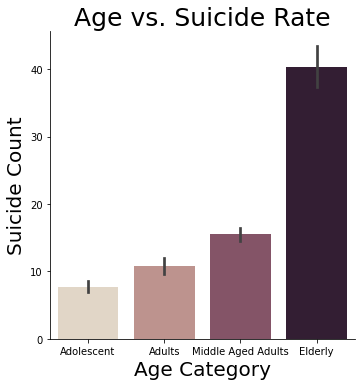

In [11]:
sns.catplot(x = "AgeCat", y = "Suicide Rate (per 100,000 population)", data = suicide_data_new,
           palette = "ch:.25", kind = "bar")

plt.title("Age vs. Suicide Rate", size = 25)
plt.xlabel("Age Category", size = 20)
plt.ylabel("Suicide Count", size = 20)

## Objective 3: Relationship between sex and suicide rate

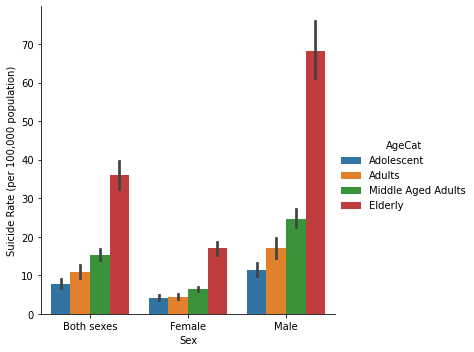

In [12]:
sns.catplot(x = "Sex", y = "Suicide Rate (per 100,000 population)", data = suicide_data_new, hue = "AgeCat", kind = "bar")

# Linear Regression + Predictive Analysis

In [20]:
model_suicide_data = suicide_data_new.loc[:, ["Year", "Sex", "Age", "Suicide Rate (per 100,000 population)"]]
model_suicide_data.head()

x = model_suicide_data.iloc[:, :-1]. values # grab the every column except the last
y = model_suicide_data.iloc[:, -1].values # grab the last column

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [("encoder", OneHotEncoder(), [1])], remainder = "passthrough")
x = np.array(ct.fit_transform(x))

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 1)

In [23]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [24]:
# Both sexes: [1, 0, 0]
# Female: [0, 1, 0]
# Male: [0, 0, 1]

print(regressor.predict([[0, 0, 1, 65, 2019]]))

[1360.18676164]


In [25]:
# When looking at the predicted value when looking changing the age, the value doesn't change,
# so I will look at the coeffiencient. Age doesn't appear to have a large coefficient
# compared to gender. Year has a coef. of 0 because 2019 is the only year
# To look at linearity for Age, a scatterplot was made with it's subsequent correlation coefficient

print('Coefficients: \n', regressor.coef_)

Coefficients: 
 [ -1.88316952 -13.70860232  15.59177184   0.           0.6709489 ]


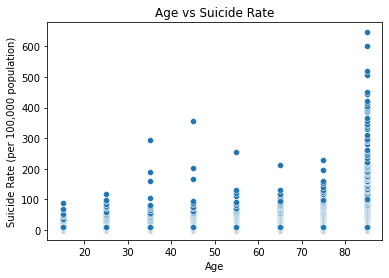

Correlation Coefficient: 0.34902559308819364


In [26]:
from scipy.stats import pearsonr

# Create a scatter plot
sns.scatterplot(x='Age', y='Suicide Rate (per 100,000 population)', data=model_suicide_data)

# Calculate correlation coefficient
correlation_coefficient, _ = pearsonr(model_suicide_data['Age'], model_suicide_data['Suicide Rate (per 100,000 population)'])

plt.title('Age vs Suicide Rate')
plt.xlabel('Age')
plt.ylabel('Suicide Rate (per 100,000 population)')
plt.show()

print("Correlation Coefficient:", correlation_coefficient)